# Benchmark experiments

### Benchmarking the assembly of a Laplace single layer operator

In our first experiment we benchmark the assembly of a Laplace single layer boundary operator.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import bempp.api
import numpy as np

In [2]:
from bempp.core.opencl_kernels import default_device, set_default_cpu_device_by_name, set_default_gpu_device_by_name, default_cpu_device, default_gpu_device

def run_single_layer_benchmark():
    """Benchmark the single layer operator."""
    grid_sizes = [3, 4, 5, 6]
    nelements = []
    results = {}
    results[("P0", "single")] = []
    results[("P0", "double")] = []
    results[("P1", "single")] = []
    results[("P1", "double")] = []
    results["nelements"] = []
    
    print(f"Default Device: {default_device().name}")


    for grid_size in grid_sizes:
        grid = bempp.api.shapes.regular_sphere(grid_size)
        p0_space = bempp.api.function_space(grid, "DP", 0)
        p1_space = bempp.api.function_space(grid, "P", 1)
        result_p0_single = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.laplace.single_layer(p0_space, p0_space, p0_space, precision="single").weak_form()
        result_p1_single = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.laplace.single_layer(p1_space, p1_space, p1_space, precision="single").weak_form()
        result_p0_double = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.laplace.single_layer(p0_space, p0_space, p0_space, precision="double").weak_form()
        result_p1_double = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.laplace.single_layer(p1_space, p1_space, p1_space, precision="double").weak_form()
        results[("P0", "single")].append(result_p0_single.best)
        results[("P0", "double")].append(result_p0_double.best)
        results[("P1", "single")].append(result_p1_single.best)
        results[("P1", "double")].append(result_p1_double.best)
        results["nelements"].append(grid.number_of_elements)
        
    return results

# Tests for single layer assembly

In [3]:
bempp.core.opencl_kernels.set_default_cpu_device_by_name('Portable Computing Language')
results_pocl = run_single_layer_benchmark()

bempp.core.opencl_kernels.set_default_cpu_device_by_name('Intel(R) OpenCL')
results_intel = run_single_layer_benchmark()

Default Device: pthread-Intel(R) Core(TM) i9-9980HK CPU @ 2.40GHz
28.8 ms ± 2.45 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
54.2 ms ± 491 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
32.6 ms ± 274 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
58 ms ± 699 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
69.6 ms ± 16.6 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
125 ms ± 10.3 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
83 ms ± 1.51 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
146 ms ± 5.52 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
362 ms ± 13.6 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
868 ms ± 96.6 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
666 ms ± 309 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
1.38 s ± 2.94 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
4.26 s ± 88.5 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
13.9 s ± 131 ms per loop (mean ± std. d

/home/betcke/miniconda3/envs/dev/lib/python3.9/site-packages/pyopencl/__init__.py:266: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


75.6 ms ± 4.8 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
49.4 ms ± 347 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
68.8 ms ± 1.07 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
80.6 ms ± 4.76 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
129 ms ± 11.2 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
110 ms ± 446 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
155 ms ± 2.59 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
392 ms ± 18.5 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
685 ms ± 41.5 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
913 ms ± 3.26 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
1.41 s ± 4.05 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
10.3 s ± 57.3 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
9.03 s ± 99.2 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
25.5 s ± 181 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
20.5 s ± 7.19 ms per loop (mean ± 

/usr/share/fonts/truetype/freefont/FreeSans.ttf
[512, 2048, 8192, 32768]
[0.026358436000009533, 0.05305488600015451, 0.3484286779998911, 4.173997689500084]
[0.032365660000095886, 0.0815213330001825, 0.6659257075000369, 9.609034696499975]


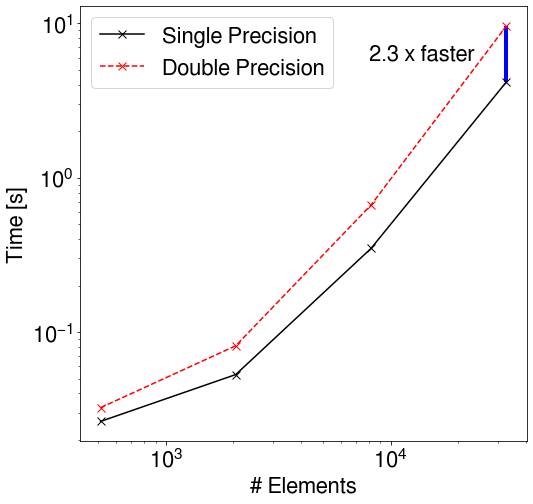

In [4]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.size'] = 22
rcParams['font.sans-serif'] = ['FreeSans']
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
print(font)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

results = results_pocl

basis_type = "P0"

arrow_length = results[(basis_type, "double")][-1] - results[(basis_type, "single")][-1]
speedup = "{0:1.1f} x faster".format(results[(basis_type, "double")][-1] / results[(basis_type, "single")][-1])

plt.loglog(results["nelements"], results[(basis_type, "single")], 'k-x', markersize=8)
plt.loglog(results["nelements"], results[(basis_type, "double")], 'r--x', markersize=8)
plt.legend(["Single Precision", "Double Precision"])
plt.arrow(results['nelements'][-1], results[(basis_type, "single")][-1], 0, 
          arrow_length,
          linestyle='--', ec="blue", lw=4, head_length=0)
plt.annotate(speedup, xy=(8E3, results[(basis_type, "single")][-1] + .3 * arrow_length))
plt.xlabel('# Elements')
plt.ylabel('Time [s]')
plt.savefig('pocl_single_layer.pdf', bbox_inches='tight', transparent=True)

print(results["nelements"])
print(results[(basis_type, "single")])
print(results[(basis_type, "double")])

## Draw Histogram chart

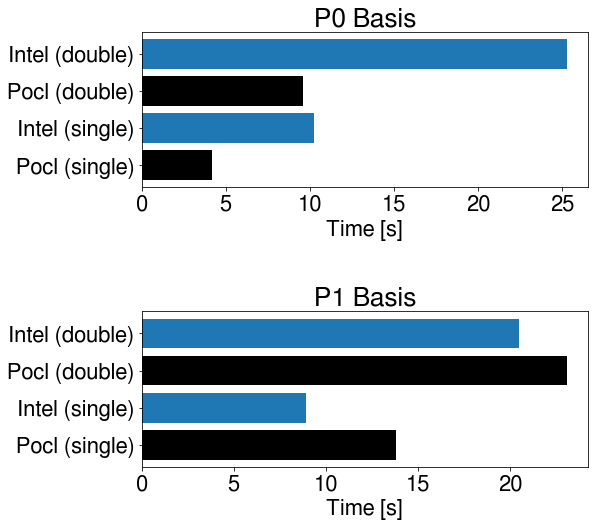

In [5]:
values_p0 = [results_pocl["P0", "single"][-1],
          results_intel["P0", "single"][-1],
          results_pocl["P0", "double"][-1],
          results_intel["P0", "double"][-1],
         ]

values_p1 = [results_pocl["P1", "single"][-1],
          results_intel["P1", "single"][-1],
          results_pocl["P1", "double"][-1],
          results_intel["P1", "double"][-1],
         ]


labels = ["Pocl (single)", "Intel (single)", "Pocl (double)", "Intel (double)"]
pos = range(4)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(211)

container = ax.barh(pos, values_p0)

container.patches[0].set_facecolor('k')
container.patches[2].set_facecolor('k')
ax.set_xlabel("Time [s]")
ax.set_yticks(pos);
ax.set_yticklabels(labels);
ax.set_title("P0 Basis")


ax = fig.add_subplot(212)
container = ax.barh(pos, values_p1)
ax.set_xlabel("Time [s]")
ax.set_yticks(pos);
ax.set_yticklabels(labels);
ax.set_title("P1 Basis")
plt.subplots_adjust(hspace=.8)

container.patches[0].set_facecolor('k')
container.patches[2].set_facecolor('k')

plt.savefig("intel_pocl_laplace_comp.pdf", bbox_inches='tight', transparent=True);

# GPU vs CPU vs Numba for Laplace single-layer

In [6]:
bempp.api.BOUNDARY_OPERATOR_DEVICE_TYPE = 'gpu'

def test_single_layer():
    """Run a single layer benchmark for a specific grid."""
    
    grid = bempp.api.shapes.regular_sphere(4)
    p0_space = bempp.api.function_space(grid, "DP", 0)
    single_time = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.laplace.single_layer(p0_space, p0_space, p0_space, precision="single").weak_form()
    double_time = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.laplace.single_layer(p0_space, p0_space, p0_space, precision="double").weak_form()
    
    return single_time, double_time

In [7]:
print("Run GPU Test")
bempp.api.BOUNDARY_OPERATOR_DEVICE_TYPE = "gpu"
res_gpu_single, res_gpu_double = test_single_layer()

print("Run Pocl Tst")
bempp.api.BOUNDARY_OPERATOR_DEVICE_TYPE = "cpu"
bempp.core.opencl_kernels.set_default_cpu_device_by_name('Portable Computing Language')
res_cpu_single, res_cpu_double = test_single_layer()

print("Run Numba Test")
bempp.api.BOUNDARY_OPERATOR_DEVICE_TYPE = "cpu"
bempp.api.DEFAULT_DEVICE_INTERFACE = "numba"
res_numba_single, res_numba_double = test_single_layer()
bempp.api.DEFAULT_DEVICE_INTERFACE = "opencl"

Run GPU Test


/home/betcke/miniconda3/envs/dev/lib/python3.9/site-packages/pyopencl/__init__.py:266: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


156 ms ± 52 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
3.05 s ± 6.06 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
Run Pocl Tst
57.3 ms ± 7.72 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
76.6 ms ± 623 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)
Run Numba Test
The slowest run took 11.50 times longer than the fastest. This could mean that an intermediate result is being cached.
1.61 s ± 1.35 s per loop (mean ± std. dev. of 2 runs, 2 loops each)
The slowest run took 8.66 times longer than the fastest. This could mean that an intermediate result is being cached.
1.22 s ± 967 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)


## Comparison of POCL and Intel for complex Helmholtz kernel

In [8]:
# def run_single_layer_helmholtz_benchmark():
#     """Benchmark the single layer operator."""
#     grid_sizes = [3, 4, 5, 6]
#     nelements = []
#     results = {}
#     results[("P0", "single")] = []
#     results[("P0", "double")] = []
#     results[("P1", "single")] = []
#     results[("P1", "double")] = []
#     results["nelements"] = []
    
#     print(f"Default Device: {default_device().name}")


#     for grid_size in grid_sizes:
#         grid = bempp.api.shapes.regular_sphere(grid_size)
#         p0_space = bempp.api.function_space(grid, "DP", 0)
#         p1_space = bempp.api.function_space(grid, "P", 1)
#         result_p0_single = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.helmholtz.single_layer(p0_space, p0_space, p0_space, 1.0, precision="single").weak_form()
#         result_p0_double = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.helmholtz.single_layer(p0_space, p0_space, p0_space, 1.0, precision="double").weak_form()
#         result_p1_single = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.helmholtz.single_layer(p1_space, p1_space, p1_space, 1.0, precision="single").weak_form()
#         result_p1_double = %timeit -o -r 2 -n 2 bempp.api.operators.boundary.helmholtz.single_layer(p1_space, p1_space, p1_space, 1.0, precision="double").weak_form()
#         results[("P0", "single")].append(result_p0_single.best)
#         results[("P0", "double")].append(result_p0_double.best)
#         results[("P1", "single")].append(result_p1_single.best)
#         results[("P1", "double")].append(result_p1_double.best)
#         results["nelements"].append(grid.number_of_elements)
        
#     return results

In [9]:
# bempp.core.opencl_kernels.set_default_cpu_device_by_name('Portable Computing Language')
# results_helmholtz_pocl = run_single_layer_benchmark()

# bempp.core.opencl_kernels.set_default_cpu_device_by_name('Intel(R) OpenCL')
# results_helmholtz_intel = run_single_layer_benchmark()

In [10]:
# values_p0 = [results_helmholtz_pocl["P0", "single"][-1],
#           results_helmholtz_intel["P0", "single"][-1],
#           results_helmholtz_pocl["P0", "double"][-1],
#           results_helmholtz_intel["P0", "double"][-1],
#          ]


# labels = ["Pocl (single)", "Intel (single)", "Pocl (double)", "Intel (double)"]
# pos = range(4)

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111)

# ax.barh(pos, values_p0)
# ax.set_xlabel("Time [s]")
# ax.set_yticks(pos);
# ax.set_yticklabels(labels);
# ax.set_title("P0 Basis")


In [11]:
# results_helmholtz_pocl["P0", "double"]

In [12]:
# results_helmholtz_intel["P0", "single"]

## Performance of domain potentials

We benchmark the electric field domain potential operator defined over the unit sphere to evaluate the potential at a number of points outside the unit sphere.

In [13]:
npoints = 50000

rand = np.random.RandomState(0)

# Points are shifted away from the unit sphere
points = rand.rand(3, npoints) + 1.5

grid = bempp.api.shapes.regular_sphere(6)
space = bempp.api.function_space(grid, "RWG", 0)


def test_potential():
    """Test the potential operator."""

    fun = bempp.api.GridFunction.from_random(space)
    
    op = bempp.api.operators.potential.maxwell.electric_field(space, points, 1.0, precision='single')    
    result_single = %timeit -o -r 2 -n 2 op @ fun
    
    op = bempp.api.operators.potential.maxwell.electric_field(space, points, 1.0, precision='double')        
    result_double = %timeit -o -r 2 -n 2 op @ fun
    
    
    return result_single.best, result_double.best

In [14]:
print("Benchmark potential on CPU with Pocl")

set_default_cpu_device_by_name("Portable Computing Language")

bempp.api.POTENTIAL_OPERATOR_DEVICE_TYPE = 'cpu'
result_potential_pocl_single, result_potential_pocl_double = test_potential()

print("Benchmark potential on CPU with Pocl")
bempp.api.POTENTIAL_OPERATOR_DEVICE_TYPE = 'gpu'
result_potential_nvidia_single, result_potential_nvidia_double = test_potential()

Benchmark potential on CPU with Pocl
23.8 s ± 473 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
55.4 s ± 44.3 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
Benchmark potential on CPU with Pocl
1.42 s ± 13.9 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)
30.3 s ± 735 µs per loop (mean ± std. dev. of 2 runs, 2 loops each)


range(0, 4)
[23.33914251899978, 1.4070672815000762, 55.30712647050041, 30.2567054189999]


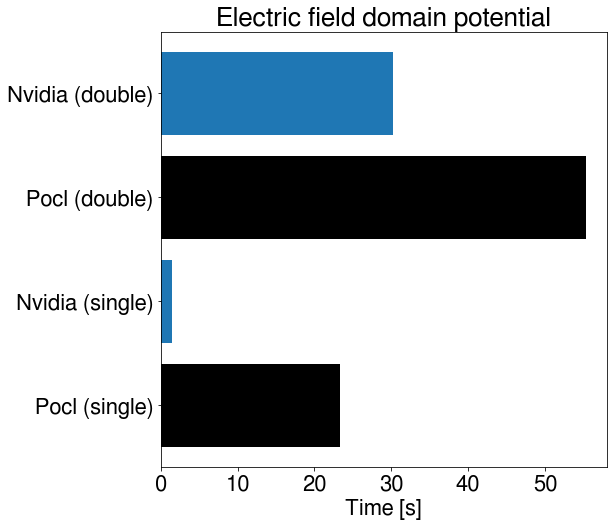

In [15]:
potential_times = [result_potential_pocl_single,
                   result_potential_nvidia_single,
                   result_potential_pocl_double,
                   result_potential_nvidia_double]

labels = ["Pocl (single)", "Nvidia (single)", "Pocl (double)", "Nvidia (double)"]
pos = range(4)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

print(pos)
print(potential_times)

container = ax.barh(pos, potential_times)

container.patches[0].set_facecolor('k')
container.patches[2].set_facecolor('k')
ax.set_xlabel("Time [s]")
ax.set_yticks(pos);
ax.set_yticklabels(labels);
ax.set_title("Electric field domain potential");

plt.savefig("efield_domain_potential.pdf", bbox_inches='tight', transparent=True)